## Name : Tirth Hihoriya
## Roll no : 18bce244
## Prac- 3 : CNN

In [1]:
import numpy as np
import pandas as pd
from keras.datasets.mnist import load_data
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

## Load dataset

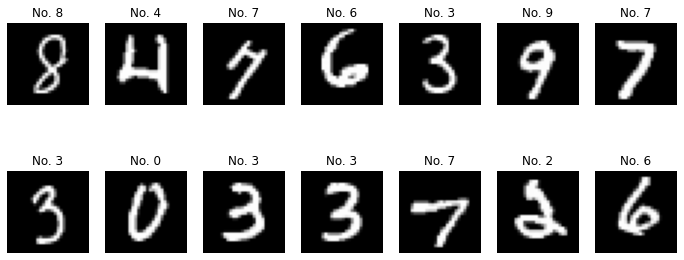

In [25]:
(x_train, y_train), (x_test, y_test) = load_data()


rand_14 = np.random.randint(0, x_train.shape[0],14)
sample_digits = x_train[rand_14]
sample_labels = y_train[rand_14]
# code to view the images
num_rows, num_cols = 2, 7
f, ax = plt.subplots(num_rows, num_cols, figsize=(12,5),)

for r in range(num_rows):
    for c in range(num_cols):
        image_index = r * 7 + c
        ax[r,c].axis("off")
        ax[r,c].imshow(sample_digits[image_index], cmap='gray')
        ax[r,c].set_title('No. %d' % sample_labels[image_index])
plt.show()
plt.close()

## Reshaping and Normalizing

In [26]:
# Reshaping 
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')
input_shape = (28, 28, 1)

# Normalizing 
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


## One hot encoding

In [27]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


In [28]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
classes = y_train.shape[1]
print("Number of classes : ", classes)

Number of classes :  10


In [29]:
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


## Creating model

In [52]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same',
                 input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))    
model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 576)              

## Fitting the model

In [53]:
results = model.fit(x_train, y_train, 
                    epochs=15, batch_size=64,
                    validation_data=(x_test, y_test))

Epoch 1/15
938/938 [==============================] - 61s 64ms/step - loss: 0.4004 - accuracy: 0.8740 - val_loss: 0.0388 - val_accuracy: 0.9888
Epoch 2/15
938/938 [==============================] - 61s 65ms/step - loss: 0.0497 - accuracy: 0.9848 - val_loss: 0.0351 - val_accuracy: 0.9886
Epoch 3/15
938/938 [==============================] - 72s 77ms/step - loss: 0.0333 - accuracy: 0.9905 - val_loss: 0.0277 - val_accuracy: 0.9904
Epoch 4/15
938/938 [==============================] - 78s 83ms/step - loss: 0.0235 - accuracy: 0.9925 - val_loss: 0.0276 - val_accuracy: 0.9919
Epoch 5/15
938/938 [==============================] - 80s 85ms/step - loss: 0.0203 - accuracy: 0.9943 - val_loss: 0.0254 - val_accuracy: 0.9925
Epoch 6/15
938/938 [==============================] - 76s 81ms/step - loss: 0.0152 - accuracy: 0.9954 - val_loss: 0.0319 - val_accuracy: 0.9906
Epoch 7/15
938/938 [==============================] - 78s 83ms/step - loss: 0.0131 - accuracy: 0.9955 - val_loss: 0.0282 - val_accuracy:

In [61]:
from sklearn import metrics

pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)
y_test = np.argmax(y_test, axis=1)

print(metrics.accuracy_score(y_test,pred))
print(metrics.classification_report(y_test,pred))
print(metrics.confusion_matrix(y_test,pred))

0.9904
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       1.00      1.00      1.00      1135
           2       1.00      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       1.00      0.99      0.99       982
           5       0.98      1.00      0.99       892
           6       1.00      0.99      0.99       958
           7       0.97      1.00      0.98      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

[[ 979    0    0    0    0    0    0    1    0    0]
 [   0 1130    0    2    0    0    0    3    0    0]
 [   1    0 1018    0    0    0    1   11    1    0]
 [   0    0    0 1006    0    3    0    1    0    0]
 [   0    0    0    0 

In [10]:
def show_plots(history):
    loss_vals = history['loss']
    val_loss_vals = history['val_loss']
    epochs = range(1, len(history['accuracy'])+1)
    
    f, ax = plt.subplots(nrows=1,ncols=2,figsize=(16,4))
    
    # plot losses on ax[0]
    ax[0].plot(epochs, loss_vals, color='navy',marker='o', linestyle=' ', label='Training Loss')
    ax[0].plot(epochs, val_loss_vals, color='firebrick', marker='*', label='Validation Loss')
    ax[0].set_title('Training & Validation Loss')
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Loss')
    ax[0].legend(loc='best')
    ax[0].grid(True)
    
    # plot accuracies
    acc_vals = history['accuracy']
    val_acc_vals = history['val_accuracy']

    ax[1].plot(epochs, acc_vals, color='navy', marker='o', ls=' ', label='Training Accuracy')
    ax[1].plot(epochs, val_acc_vals, color='firebrick', marker='*', label='Validation Accuracy')
    ax[1].set_title('Training & Validation Accuracy')
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Accuracy')
    ax[1].legend(loc='best')
    ax[1].grid(True)
    
    plt.show()
    plt.close()
    
    # delete locals before exiting
    del loss_vals, val_loss_vals, epochs, acc_vals, val_acc_vals

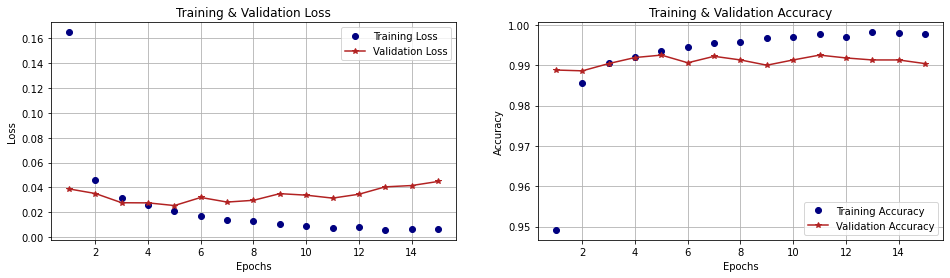

gg


In [78]:
show_plots(results.history)

## Creating other model  ( dropout is used )

In [74]:
model2 = Sequential()

model2.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same',
                 input_shape=(28, 28, 1)))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
model2.add(MaxPooling2D(pool_size=(2,2)))  

model2.add(Dropout(0.2))
model2.add(Flatten())

model2.add(Dense(128, activation='relu'))

model2.add(Dense(classes, activation='softmax'))

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model2.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 3, 3, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 3, 3, 64)         

In [75]:
results2 = model2.fit(x_train, y_train, 
                    epochs=15, batch_size=64,
                    validation_data=(x_test, y_test))

Epoch 1/15
938/938 [==============================] - 63s 67ms/step - loss: 0.4299 - accuracy: 0.8618 - val_loss: 0.0471 - val_accuracy: 0.9835
Epoch 2/15
938/938 [==============================] - 63s 67ms/step - loss: 0.0548 - accuracy: 0.9830 - val_loss: 0.0315 - val_accuracy: 0.9894
Epoch 3/15
938/938 [==============================] - 62s 66ms/step - loss: 0.0380 - accuracy: 0.9876 - val_loss: 0.0258 - val_accuracy: 0.9913
Epoch 4/15
938/938 [==============================] - 64s 68ms/step - loss: 0.0298 - accuracy: 0.9908 - val_loss: 0.0315 - val_accuracy: 0.9905
Epoch 5/15
938/938 [==============================] - 66s 70ms/step - loss: 0.0243 - accuracy: 0.9917 - val_loss: 0.0248 - val_accuracy: 0.9923
Epoch 6/15
938/938 [==============================] - 66s 71ms/step - loss: 0.0199 - accuracy: 0.9934 - val_loss: 0.0218 - val_accuracy: 0.9929
Epoch 7/15
938/938 [==============================] - 69s 74ms/step - loss: 0.0178 - accuracy: 0.9943 - val_loss: 0.0229 - val_accuracy:

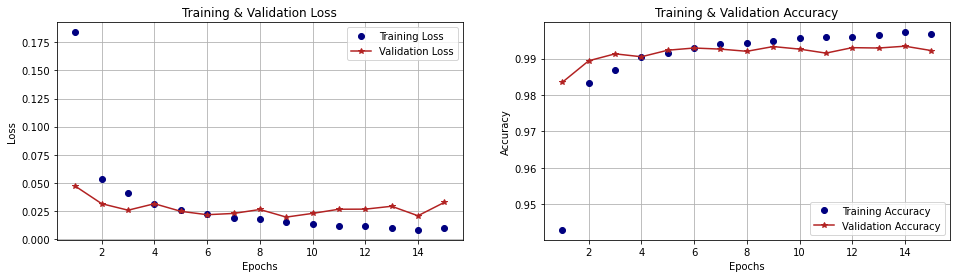

In [76]:
show_plots(results2.history)

In [77]:
pred2 = model2.predict(x_test)
pred2 = np.argmax(pred2, axis=1)
y_test = np.argmax(y_test, axis=1)

print(metrics.accuracy_score(y_test,pred2))
print(metrics.classification_report(y_test,pred2))
print(metrics.confusion_matrix(y_test,pred2))

0.9922
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       1.00      0.98      0.99      1032
           3       0.99      1.00      1.00      1010
           4       0.99      1.00      0.99       982
           5       1.00      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       1.00      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

[[ 975    0    2    0    0    0    0    1    2    0]
 [   0 1135    0    0    0    0    0    0    0    0]
 [   0    5 1014    1    0    0    0   12    0    0]
 [   0    1    0 1008    0    1    0    0    0    0]
 [   0    0    0    0 

# Just experimenting

### Dropout = 0.45

In [7]:
model3 = Sequential()

model3.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same',
                 input_shape=(28, 28, 1)))
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
model3.add(MaxPooling2D(pool_size=(2,2)))  

model3.add(Dropout(0.45))
model3.add(Flatten())

model3.add(Dense(128, activation='relu'))

model3.add(Dense(classes, activation='softmax'))

model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 3, 3, 64)          0

In [8]:
results3 = model3.fit(x_train, y_train, 
                    epochs=5, batch_size=64,
                    validation_data=(x_test, y_test))

Epoch 1/5
938/938 [==============================] - 54s 56ms/step - loss: 0.4916 - accuracy: 0.8361 - val_loss: 0.0523 - val_accuracy: 0.9842
Epoch 2/5
938/938 [==============================] - 59s 62ms/step - loss: 0.0760 - accuracy: 0.9764 - val_loss: 0.0346 - val_accuracy: 0.9889
Epoch 3/5
938/938 [==============================] - 62s 66ms/step - loss: 0.0548 - accuracy: 0.9832 - val_loss: 0.0258 - val_accuracy: 0.9909
Epoch 4/5
938/938 [==============================] - 65s 69ms/step - loss: 0.0473 - accuracy: 0.9849 - val_loss: 0.0218 - val_accuracy: 0.9926
Epoch 5/5
938/938 [==============================] - 59s 63ms/step - loss: 0.0368 - accuracy: 0.9885 - val_loss: 0.0260 - val_accuracy: 0.9917


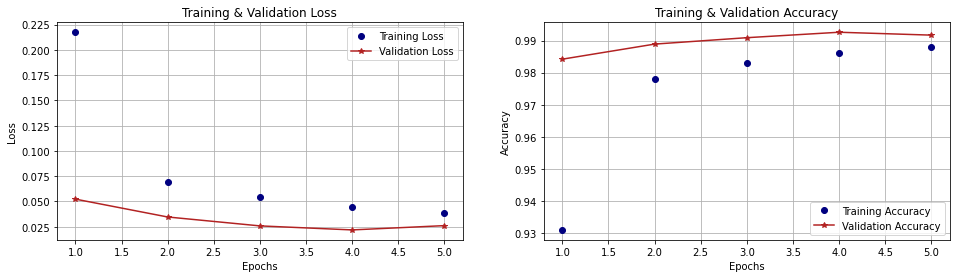

In [11]:
show_plots(results3.history)

In [30]:
from sklearn import metrics
pred3 = model3.predict(x_test)
pred3 = np.argmax(pred3, axis=1)
y_test = np.argmax(y_test, axis=1)

print(metrics.accuracy_score(y_test,pred3))
print(metrics.classification_report(y_test,pred3))
print(metrics.confusion_matrix(y_test,pred3))

0.9917
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       0.99      1.00      0.99      1135
           2       0.99      1.00      0.99      1032
           3       1.00      0.99      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.98      0.98      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

[[ 977    0    0    0    0    0    2    1    0    0]
 [   1 1131    0    1    0    1    1    0    0    0]
 [   1    1 1027    0    1    0    0    2    0    0]
 [   0    0    0 1000    0    5    0    1    4    0]
 [   0    0    0    0 